
CLASSIFICATION RESULTS (IRIS)

                    Model  Accuracy  Precision  Recall (Sensitivity)  F1 Score
0                     KNN  1.000000   1.000000              1.000000  1.000000
1             Naive Bayes  0.966667   0.969697              0.966667  0.966583
2           Decision Tree  0.933333   0.933333              0.933333  0.933333
3     Logistic Regression  0.966667   0.969697              0.966667  0.966583
4  SGD (Gradient Descent)  0.833333   0.888889              0.833333  0.822222


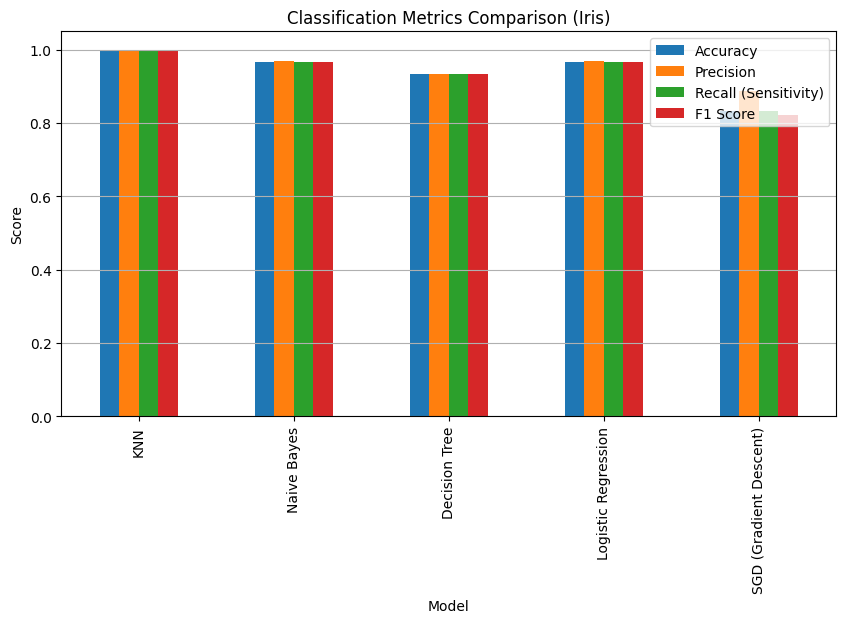

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, r2_score
)
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SGD (Gradient Descent)": SGDClassifier(loss="log_loss", random_state=42)
}
clf_results = []

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    clf_results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average="macro"),
        recall_score(y_test, y_pred, average="macro"),   
        f1_score(y_test, y_pred, average="macro")
    ])
clf_df = pd.DataFrame(
    clf_results,
    columns=["Model", "Accuracy", "Precision", "Recall (Sensitivity)", "F1 Score"]
)
print("\nCLASSIFICATION RESULTS (IRIS)\n")
print(clf_df)
clf_df.set_index("Model").plot(kind="bar", figsize=(10,5))
plt.title("Classification Metrics Comparison (Iris)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.grid(axis="y")
plt.show()
